In [ ]:
!pip install pandapy

In [ ]:
import pandapy as pp
import numpy as np

Back to GitHub.

Read In Arrays

In [ ]:
# First Example
multiple_stocks = pp.read('https://github.com/firmai/random-assets-two/blob/master/numpy/multiple_stocks.csv?raw=true')
closing = multiple_stocks[['Ticker','Date','Adj_Close']]
piv = pp.pivot(closing,"Date","Ticker","Adj_Close"); piv
closing = pp.to_struct(piv, name_list = [x for x in np.unique(multiple_stocks["Ticker"])])

# Second Example
tsla = pp.read('https://github.com/firmai/random-assets-two/raw/master/numpy/tsla.csv')
crm = pp.read('https://github.com/firmai/random-assets-two/raw/master/numpy/crm.csv')
tsla_sub = tsla[["Date","Adj_Close","Volume"]]
crm_sub = crm[["Date","Adj_Close","Volume"]]
crm_adj = crm[['Date','Adj_Close']]

In [ ]:
closing

array([(37.24206924, 100.45429993, 44.57522202, 20.72605705, 130.59109497, 35.80251312,  41.9791832 ,  81.51140594, 66.33999634),
       (35.08446503,  97.62433624, 43.83200836, 20.34561157, 128.53627014, 35.80251312,  41.59314346,  80.89860535, 66.15000153),
       (35.34244537,  97.63354492, 42.79874039, 19.90727234, 125.76422119, 36.07437897,  40.98268127,  80.28580475, 64.58000183),
       ...,
       (21.57999992, 289.79998779, 59.08000183, 11.18000031, 135.27000427, 55.34999847, 158.96000671, 137.53999329, 88.37000275),
       (21.34000015, 291.51998901, 58.65999985, 11.07999992, 132.80999756, 55.27000046, 157.58999634, 136.80999756, 87.95999908),
       (21.51000023, 293.6499939 , 58.47999954, 11.15999985, 134.03999329, 55.34999847, 157.69999695, 136.66999817, 88.08999634)],
      dtype=[('AA', '<f8'), ('AAPL', '<f8'), ('DAL', '<f8'), ('GE', '<f8'), ('IBM', '<f8'), ('KO', '<f8'), ('MSFT', '<f8'), ('PEP', '<f8'), ('UAL', '<f8')])

In [ ]:
pp.rename(closing,["AA","AAPL"],["GAP","FAF"])[:5]

array([(37.24206924, 100.45429993, 44.57522202, 20.72605705, 130.59109497, 35.80251312, 41.9791832 , 81.51140594, 66.33999634),
       (35.08446503,  97.62433624, 43.83200836, 20.34561157, 128.53627014, 35.80251312, 41.59314346, 80.89860535, 66.15000153),
       (35.34244537,  97.63354492, 42.79874039, 19.90727234, 125.76422119, 36.07437897, 40.98268127, 80.28580475, 64.58000183),
       (36.25707626,  99.00255585, 42.57216263, 19.91554451, 124.94229126, 36.52467346, 41.50337982, 82.63342285, 65.52999878),
       (37.28897095, 102.80648041, 43.67792892, 20.15538216, 127.65791321, 36.966465  , 42.72432327, 84.13523865, 66.63999939)],
      dtype=[('GAP', '<f8'), ('FAF', '<f8'), ('DAL', '<f8'), ('GE', '<f8'), ('IBM', '<f8'), ('KO', '<f8'), ('MSFT', '<f8'), ('PEP', '<f8'), ('UAL', '<f8')])

In [ ]:
pp.rename(closing,"AA", "GALLY")[:5]

array([(37.24206924, 100.45429993, 44.57522202, 20.72605705, 130.59109497, 35.80251312, 41.9791832 , 81.51140594, 66.33999634),
       (35.08446503,  97.62433624, 43.83200836, 20.34561157, 128.53627014, 35.80251312, 41.59314346, 80.89860535, 66.15000153),
       (35.34244537,  97.63354492, 42.79874039, 19.90727234, 125.76422119, 36.07437897, 40.98268127, 80.28580475, 64.58000183),
       (36.25707626,  99.00255585, 42.57216263, 19.91554451, 124.94229126, 36.52467346, 41.50337982, 82.63342285, 65.52999878),
       (37.28897095, 102.80648041, 43.67792892, 20.15538216, 127.65791321, 36.966465  , 42.72432327, 84.13523865, 66.63999939)],
      dtype=[('GALLY', '<f8'), ('AAPL', '<f8'), ('DAL', '<f8'), ('GE', '<f8'), ('IBM', '<f8'), ('KO', '<f8'), ('MSFT', '<f8'), ('PEP', '<f8'), ('UAL', '<f8')])

In [ ]:
def describe(array):
  fill_array = np.zeros(shape=(7,len(array.dtype.names)))
  col_keys = ["observations", "minimum", "maximum", "mean", "variance", "skewness", "kurtosis"]
  en_dec = 0 
  names = []
  for en, arr in enumerate(array.dtype.names): #do not need the loop at this point, but looks prettier
    
    en = en - en_dec
    try:
      desc = stats.describe(array[arr])
      names.append(arr)
      
    except:
      fill_array = np.delete(fill_array,en,1)
      en_dec = en_dec + 1
      continue
    col_values = [desc[0], desc[1][0], desc[1][1], desc[2], desc[3], desc[4], desc[5]]
    # newrow = [1,2,3]
    # A = numpy.vstack([A, newrow])
    fill_array[:,en] = col_values
  fill_array = np.round(fill_array,3)
  table(fill_array.T,None, names,col_keys,"Describe")
  return fill_array

In [ ]:
described = pp.describe(closing)

In [ ]:
removed = pp.drop(closing,["AA","AAPL","IBM"]) ; removed[:5]

array([(44.57522202, 20.72605705, 35.80251312, 41.9791832 , 81.51140594, 66.33999634),
       (43.83200836, 20.34561157, 35.80251312, 41.59314346, 80.89860535, 66.15000153),
       (42.79874039, 19.90727234, 36.07437897, 40.98268127, 80.28580475, 64.58000183),
       (42.57216263, 19.91554451, 36.52467346, 41.50337982, 82.63342285, 65.52999878),
       (43.67792892, 20.15538216, 36.966465  , 42.72432327, 84.13523865, 66.63999939)],
      dtype={'names':['DAL','GE','KO','MSFT','PEP','UAL'], 'formats':['<f8','<f8','<f8','<f8','<f8','<f8'], 'offsets':[16,24,40,48,56,64], 'itemsize':72})

In [ ]:
added = pp.add(closing,["GALLY","FAF"],[closing["IBM"],closing["AA"]]); added[:5]  ## set two new columns with that two previous columnns

array([(37.24206924, 100.45429993, 44.57522202, 20.72605705, 130.59109497, 35.80251312, 41.9791832 , 81.51140594, 66.33999634, 130.59109497, 37.24206924),
       (35.08446503,  97.62433624, 43.83200836, 20.34561157, 128.53627014, 35.80251312, 41.59314346, 80.89860535, 66.15000153, 128.53627014, 35.08446503),
       (35.34244537,  97.63354492, 42.79874039, 19.90727234, 125.76422119, 36.07437897, 40.98268127, 80.28580475, 64.58000183, 125.76422119, 35.34244537),
       (36.25707626,  99.00255585, 42.57216263, 19.91554451, 124.94229126, 36.52467346, 41.50337982, 82.63342285, 65.52999878, 124.94229126, 36.25707626),
       (37.28897095, 102.80648041, 43.67792892, 20.15538216, 127.65791321, 36.966465  , 42.72432327, 84.13523865, 66.63999939, 127.65791321, 37.28897095)],
      dtype=[('AA', '<f8'), ('AAPL', '<f8'), ('DAL', '<f8'), ('GE', '<f8'), ('IBM', '<f8'), ('KO', '<f8'), ('MSFT', '<f8'), ('PEP', '<f8'), ('UAL', '<f8'), ('GALLY', '<f8'), ('FAF', '<f8')])

In [ ]:
concat_row = pp.concat(removed[["DAL","GE"]], added[["PEP","UAL"]], type="row"); concat_row[:5]

array([(44.57522202, 20.72605705), (43.83200836, 20.34561157),
       (42.79874039, 19.90727234), (42.57216263, 19.91554451),
       (43.67792892, 20.15538216)], dtype=[('DAL', '<f8'), ('GE', '<f8')])

In [ ]:
concat_col = pp.concat(removed[["DAL","GE"]], added[["PEP","UAL"]], type="columns"); concat_col[:5]

array([(44.57522202, 20.72605705, 81.51140594, 66.33999634),
       (43.83200836, 20.34561157, 80.89860535, 66.15000153),
       (42.79874039, 19.90727234, 80.28580475, 64.58000183),
       (42.57216263, 19.91554451, 82.63342285, 65.52999878),
       (43.67792892, 20.15538216, 84.13523865, 66.63999939)],
      dtype=[('DAL', '<f8'), ('GE', '<f8'), ('PEP', '<f8'), ('UAL', '<f8')])

In [ ]:
concat_array = pp.concat(removed[["DAL","GE"]], added[["PEP","UAL"]], type="array"); concat_array[:5]

array([[(44.57522201538086, 20.726057052612305),
        (43.832008361816406, 20.345611572265625),
        (42.79874038696289, 19.907272338867188), ...,
        (59.08000183105469, 11.180000305175781),
        (58.65999984741211, 11.079999923706055),
        (58.47999954223633, 11.15999984741211)],
       [(81.51140594482422, 66.33999633789062),
        (80.89860534667969, 66.1500015258789),
        (80.28580474853516, 64.58000183105469), ...,
        (137.5399932861328, 88.37000274658203),
        (136.80999755859375, 87.95999908447266),
        (136.6699981689453, 88.08999633789062)]], dtype=object)

In [ ]:
concat_melt = pp.concat(removed[["DAL","GE"]], added[["PEP","UAL"]], type="melt"); concat_melt[:5]

array([(44.57522202, 20.72605705), (43.83200836, 20.34561157),
       (42.79874039, 19.90727234), (42.57216263, 19.91554451),
       (43.67792892, 20.15538216)], dtype=[('DAL', '<f8'), ('GE', '<f8')])

In [ ]:
merged = pp.merge(tsla_sub, crm_adj, left_on="Date", right_on="Date",how="inner",left_postscript="_TSLA",right_postscript="_CRM"); merged[:5]

array([('2019-01-02', 310.11999512, 135.55000305, 11658600),
       ('2019-01-03', 300.35998535, 130.3999939 ,  6965200),
       ('2019-01-04', 317.69000244, 137.96000671,  7394100),
       ('2019-01-07', 334.95999146, 142.22000122,  7551200),
       ('2019-01-08', 335.3500061 , 145.72000122,  7008500)],
      dtype=[('Date', '<M8[D]'), ('Adj_Close_TSLA', '<f8'), ('Adj_Close_CRM', '<f8'), ('Volume', '<i8')])

In [ ]:
## More work to done on replace (structured)
## replace(merged,original=317.69000244, replacement=np.nan)[:5]

In [ ]:
pp.table(merged[:5])

In [ ]:
### This is the new function that you should include above
### You can add the same peculuarities to remove

In [ ]:
tsla = pp.add(tsla,["Ticker"], "TSLA", "U10")
crm = pp.add(crm,["Ticker"], "CRM", "U10")
combine = pp.concat(tsla[0:5], crm[0:5], type="row"); combine

array([(315.13000488, 298.79998779, 306.1000061 , 310.11999512, 11658600, 310.11999512, '2019-01-02', 'TSLA'),
       (309.3999939 , 297.38000488, 307.        , 300.35998535,  6965200, 300.35998535, '2019-01-03', 'TSLA'),
       (318.        , 302.73001099, 306.        , 317.69000244,  7394100, 317.69000244, '2019-01-04', 'TSLA'),
       (336.73999023, 317.75      , 321.72000122, 334.95999146,  7551200, 334.95999146, '2019-01-07', 'TSLA'),
       (344.01000977, 327.01998901, 341.95999146, 335.3500061 ,  7008500, 335.3500061 , '2019-01-08', 'TSLA'),
       (136.83000183, 133.05000305, 133.3999939 , 135.55000305,  4783900, 135.55000305, '2019-01-02', 'CRM'),
       (134.77999878, 130.1000061 , 133.47999573, 130.3999939 ,  6365700, 130.3999939 , '2019-01-03', 'CRM'),
       (139.32000732, 132.22000122, 133.5       , 137.96000671,  6650600, 137.96000671, '2019-01-04', 'CRM'),
       (143.38999939, 138.78999329, 141.02000427, 142.22000122,  9064800, 142.22000122, '2019-01-07', 'CRM'),
     

In [ ]:
dropped = pp.drop(combine,["High","Low","Open"]); dropped[:10]

array([(310.11999512, 11658600, 310.11999512, '2019-01-02', 'TSLA'),
       (300.35998535,  6965200, 300.35998535, '2019-01-03', 'TSLA'),
       (317.69000244,  7394100, 317.69000244, '2019-01-04', 'TSLA'),
       (334.95999146,  7551200, 334.95999146, '2019-01-07', 'TSLA'),
       (335.3500061 ,  7008500, 335.3500061 , '2019-01-08', 'TSLA'),
       (135.55000305,  4783900, 135.55000305, '2019-01-02', 'CRM'),
       (130.3999939 ,  6365700, 130.3999939 , '2019-01-03', 'CRM'),
       (137.96000671,  6650600, 137.96000671, '2019-01-04', 'CRM'),
       (142.22000122,  9064800, 142.22000122, '2019-01-07', 'CRM'),
       (145.72000122,  9057300, 145.72000122, '2019-01-08', 'CRM')],
      dtype={'names':['Close','Volume','Adj_Close','Date','Ticker'], 'formats':['<f8','<i8','<f8','<M8[D]','<U10'], 'offsets':[24,32,40,48,56], 'itemsize':96})

In [ ]:
piv = pp.pivot(dropped,"Date","Ticker","Adj_Close",display=True)

In [ ]:
tsla_extended = pp.add(tsla,"Month",tsla["Date"],'datetime64[M]')
tsla_extended = pp.add(tsla_extended,"Year",tsla_extended["Date"],'datetime64[Y]')


In [ ]:
## faster method elsewhere
year_frame = pp.update(tsla,"Date", [dt.year for dt in tsla["Date"].astype(object)],types="|U10"); year_frame[:5]

array([(315.13000488, 298.79998779, 306.1000061 , 310.11999512, 11658600, 310.11999512, 'TSLA', '2019'),
       (309.3999939 , 297.38000488, 307.        , 300.35998535,  6965200, 300.35998535, 'TSLA', '2019'),
       (318.        , 302.73001099, 306.        , 317.69000244,  7394100, 317.69000244, 'TSLA', '2019'),
       (336.73999023, 317.75      , 321.72000122, 334.95999146,  7551200, 334.95999146, 'TSLA', '2019'),
       (344.01000977, 327.01998901, 341.95999146, 335.3500061 ,  7008500, 335.3500061 , 'TSLA', '2019')],
      dtype=[('High', '<f8'), ('Low', '<f8'), ('Open', '<f8'), ('Close', '<f8'), ('Volume', '<i8'), ('Adj_Close', '<f8'), ('Ticker', '<U10'), ('Date', '<U10')])

In [ ]:
grouped = pp.group(tsla_extended, ['Ticker','Month','Year'],['mean', 'std', 'min', 'max'], ['Adj_Close','Close'], display=True)


In [ ]:
grouped_frame = pp.pandas(grouped); grouped_frame.head()

,Ticker,Month,Year,Adj_Close_mean,Adj_Close_std,Adj_Close_min,Adj_Close_max,Close_mean,Close_std,Close_min,Close_max
0,TSLA,2019-01-01,2019-01-01,318.494284,21.098362,287.589996,347.309998,318.494284,21.098362,287.589996,347.309998
1,TSLA,2019-02-01,2019-01-01,307.728421,8.052522,291.230011,321.350006,307.728421,8.052522,291.230011,321.350006
2,TSLA,2019-03-01,2019-01-01,277.757140,8.924873,260.420013,294.790009,277.757140,8.924873,260.420013,294.790009
3,TSLA,2019-04-01,2019-01-01,266.655716,14.984572,235.139999,291.809998,266.655716,14.984572,235.139999,291.809998
4,TSLA,2019-05-01,2019-01-01,219.715454,24.039647,185.160004,255.339996,219.715454,24.039647,185.160004,255.339996


In [ ]:
struct = pp.structured(grouped_frame); struct[:5]

rec.array([('TSLA', '2019-01-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000', 318.49428449, 21.09836186, 287.58999634, 347.30999756, 318.49428449, 21.09836186, 287.58999634, 347.30999756),
           ('TSLA', '2019-02-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000', 307.72842086,  8.05252198, 291.23001099, 321.3500061 , 307.72842086,  8.05252198, 291.23001099, 321.3500061 ),
           ('TSLA', '2019-03-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000', 277.75713966,  8.92487345, 260.42001343, 294.79000854, 277.75713966,  8.92487345, 260.42001343, 294.79000854),
           ('TSLA', '2019-04-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000', 266.65571594, 14.98457194, 235.13999939, 291.80999756, 266.65571594, 14.98457194, 235.13999939, 291.80999756),
           ('TSLA', '2019-05-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000', 219.7154541 , 24.03964724, 185.16000366, 255.33999634, 219.7154541 , 24.03964724, 185.16000366, 255.33999634)],
          dtyp

In [ ]:
pp.shift(merged["Adj_Close_TSLA"],1)[:5]

array([         nan, 310.11999512, 300.35998535, 317.69000244,
       334.95999146])

In [ ]:
tsla_lagged = pp.lags(tsla_extended, "Adj_Close", 5); tsla_lagged[:5]

array([(315.13000488, 298.79998779, 306.1000061 , 310.11999512, 11658600, 310.11999512, '2019-01-02', 'TSLA', '2019-01', '2019',          nan,          nan,          nan,          nan, nan),
       (309.3999939 , 297.38000488, 307.        , 300.35998535,  6965200, 300.35998535, '2019-01-03', 'TSLA', '2019-01', '2019', 310.11999512,          nan,          nan,          nan, nan),
       (318.        , 302.73001099, 306.        , 317.69000244,  7394100, 317.69000244, '2019-01-04', 'TSLA', '2019-01', '2019', 300.35998535, 310.11999512,          nan,          nan, nan),
       (336.73999023, 317.75      , 321.72000122, 334.95999146,  7551200, 334.95999146, '2019-01-07', 'TSLA', '2019-01', '2019', 317.69000244, 300.35998535, 310.11999512,          nan, nan),
       (344.01000977, 327.01998901, 341.95999146, 335.3500061 ,  7008500, 335.3500061 , '2019-01-08', 'TSLA', '2019-01', '2019', 334.95999146, 317.69000244, 300.35998535, 310.11999512, nan)],
      dtype=[('High', '<f8'), ('Low', '<f8')

In [ ]:
correlated = pp.corr(closing)

In [ ]:
pp.returns(closing,"IBM",type="log")

array([        nan, -0.01585991, -0.02180223, ...,  0.0026649 ,
       -0.0183533 ,  0.0092187 ])

In [ ]:
loga = pp.returns(closing,"IBM",type="normal"); loga

array([        nan, -0.0157348 , -0.02156628, ...,  0.00266845,
       -0.0181859 ,  0.00926132])

In [ ]:
close_ret = pp.add(closing,"IBM_log_return",loga); close_ret[:5]

array([(37.24206924, 100.45429993, 44.57522202, 20.72605705, 130.59109497, 35.80251312, 41.9791832 , 81.51140594, 66.33999634,         nan),
       (35.08446503,  97.62433624, 43.83200836, 20.34561157, 128.53627014, 35.80251312, 41.59314346, 80.89860535, 66.15000153, -0.0157348 ),
       (35.34244537,  97.63354492, 42.79874039, 19.90727234, 125.76422119, 36.07437897, 40.98268127, 80.28580475, 64.58000183, -0.02156628),
       (36.25707626,  99.00255585, 42.57216263, 19.91554451, 124.94229126, 36.52467346, 41.50337982, 82.63342285, 65.52999878, -0.00653548),
       (37.28897095, 102.80648041, 43.67792892, 20.15538216, 127.65791321, 36.966465  , 42.72432327, 84.13523865, 66.63999939,  0.02173501)],
      dtype=[('AA', '<f8'), ('AAPL', '<f8'), ('DAL', '<f8'), ('GE', '<f8'), ('IBM', '<f8'), ('KO', '<f8'), ('MSFT', '<f8'), ('PEP', '<f8'), ('UAL', '<f8'), ('IBM_log_return', '<f8')])

In [ ]:
close_ret_na = pp.dropnarow(close_ret, "IBM_log_return"); close_ret[:5]

array([(37.24206924, 100.45429993, 44.57522202, 20.72605705, 130.59109497, 35.80251312, 41.9791832 , 81.51140594, 66.33999634,         nan),
       (35.08446503,  97.62433624, 43.83200836, 20.34561157, 128.53627014, 35.80251312, 41.59314346, 80.89860535, 66.15000153, -0.0157348 ),
       (35.34244537,  97.63354492, 42.79874039, 19.90727234, 125.76422119, 36.07437897, 40.98268127, 80.28580475, 64.58000183, -0.02156628),
       (36.25707626,  99.00255585, 42.57216263, 19.91554451, 124.94229126, 36.52467346, 41.50337982, 82.63342285, 65.52999878, -0.00653548),
       (37.28897095, 102.80648041, 43.67792892, 20.15538216, 127.65791321, 36.966465  , 42.72432327, 84.13523865, 66.63999939,  0.02173501)],
      dtype=[('AA', '<f8'), ('AAPL', '<f8'), ('DAL', '<f8'), ('GE', '<f8'), ('IBM', '<f8'), ('KO', '<f8'), ('MSFT', '<f8'), ('PEP', '<f8'), ('UAL', '<f8'), ('IBM_log_return', '<f8')])

In [ ]:
pp.portfolio_value(close_ret_na, "IBM_log_return", type="log")

array([0.98438834, 0.96338604, 0.95711037, ..., 1.15115429, 1.13040872,
       1.14092643])

In [ ]:
pp.cummulative_return(close_ret_na, "IBM_log_return", type="log")

array([-0.01561166, -0.03661396, -0.04288963, ...,  0.15115429,
        0.13040872,  0.14092643])

In [ ]:
pp.fillna(tsla_lagged,type="mean")[:5]

array([(315.13000488, 298.79998779, 306.1000061 , 310.11999512, 11658600, 310.11999512, 272.95330665, 272.38631982, 271.75180703, 271.10991915, 270.48587024),
       (309.3999939 , 297.38000488, 307.        , 300.35998535,  6965200, 300.35998535, 310.11999512, 272.38631982, 271.75180703, 271.10991915, 270.48587024),
       (318.        , 302.73001099, 306.        , 317.69000244,  7394100, 317.69000244, 300.35998535, 310.11999512, 271.75180703, 271.10991915, 270.48587024),
       (336.73999023, 317.75      , 321.72000122, 334.95999146,  7551200, 334.95999146, 317.69000244, 300.35998535, 310.11999512, 271.10991915, 270.48587024),
       (344.01000977, 327.01998901, 341.95999146, 335.3500061 ,  7008500, 335.3500061 , 334.95999146, 317.69000244, 300.35998535, 310.11999512, 270.48587024)],
      dtype={'names':['High','Low','Open','Close','Volume','Adj_Close','Adj_Close_lag_1','Adj_Close_lag_2','Adj_Close_lag_3','Adj_Close_lag_4','Adj_Close_lag_5'], 'formats':['<f8','<f8','<f8','<f8','<i8',

In [ ]:
pp.fillna(tsla_lagged,type="value",value=-999999)[:5]

array([(315.13000488, 298.79998779, 306.1000061 , 310.11999512, 11658600, 310.11999512, -9.99999000e+05, -9.99999000e+05, -9.99999000e+05, -9.99999000e+05, -999999.),
       (309.3999939 , 297.38000488, 307.        , 300.35998535,  6965200, 300.35998535,  3.10119995e+02, -9.99999000e+05, -9.99999000e+05, -9.99999000e+05, -999999.),
       (318.        , 302.73001099, 306.        , 317.69000244,  7394100, 317.69000244,  3.00359985e+02,  3.10119995e+02, -9.99999000e+05, -9.99999000e+05, -999999.),
       (336.73999023, 317.75      , 321.72000122, 334.95999146,  7551200, 334.95999146,  3.17690002e+02,  3.00359985e+02,  3.10119995e+02, -9.99999000e+05, -999999.),
       (344.01000977, 327.01998901, 341.95999146, 335.3500061 ,  7008500, 335.3500061 ,  3.34959991e+02,  3.17690002e+02,  3.00359985e+02,  3.10119995e+02, -999999.)],
      dtype={'names':['High','Low','Open','Close','Volume','Adj_Close','Adj_Close_lag_1','Adj_Close_lag_2','Adj_Close_lag_3','Adj_Close_lag_4','Adj_Close_lag_5'], '

In [ ]:
pp.fillna(tsla_lagged,type="ffill")[:5]

array([(315.13000488, 298.79998779, 306.1000061 , 310.11999512, 11658600, 310.11999512,          nan,          nan,          nan,          nan, nan),
       (309.3999939 , 297.38000488, 307.        , 300.35998535,  6965200, 300.35998535, 310.11999512,          nan,          nan,          nan, nan),
       (318.        , 302.73001099, 306.        , 317.69000244,  7394100, 317.69000244, 300.35998535, 310.11999512,          nan,          nan, nan),
       (336.73999023, 317.75      , 321.72000122, 334.95999146,  7551200, 334.95999146, 317.69000244, 300.35998535, 310.11999512,          nan, nan),
       (344.01000977, 327.01998901, 341.95999146, 335.3500061 ,  7008500, 335.3500061 , 334.95999146, 317.69000244, 300.35998535, 310.11999512, nan)],
      dtype={'names':['High','Low','Open','Close','Volume','Adj_Close','Adj_Close_lag_1','Adj_Close_lag_2','Adj_Close_lag_3','Adj_Close_lag_4','Adj_Close_lag_5'], 'formats':['<f8','<f8','<f8','<f8','<i8','<f8','<f8','<f8','<f8','<f8','<f8'], 'offset

In [ ]:
pp.fillna(tsla_lagged,type="bfill")[:5]

array([(315.13000488, 298.79998779, 306.1000061 , 310.11999512, 11658600, 310.11999512, 310.11999512, 310.11999512, 310.11999512, 310.11999512, 310.11999512),
       (309.3999939 , 297.38000488, 307.        , 300.35998535,  6965200, 300.35998535, 310.11999512, 310.11999512, 310.11999512, 310.11999512, 310.11999512),
       (318.        , 302.73001099, 306.        , 317.69000244,  7394100, 317.69000244, 300.35998535, 310.11999512, 310.11999512, 310.11999512, 310.11999512),
       (336.73999023, 317.75      , 321.72000122, 334.95999146,  7551200, 334.95999146, 317.69000244, 300.35998535, 310.11999512, 310.11999512, 310.11999512),
       (344.01000977, 327.01998901, 341.95999146, 335.3500061 ,  7008500, 335.3500061 , 334.95999146, 317.69000244, 300.35998535, 310.11999512, 310.11999512)],
      dtype={'names':['High','Low','Open','Close','Volume','Adj_Close','Adj_Close_lag_1','Adj_Close_lag_2','Adj_Close_lag_3','Adj_Close_lag_4','Adj_Close_lag_5'], 'formats':['<f8','<f8','<f8','<f8','<i8',

In [ ]:
pp.fillna(tsla_lagged,type="ffill")[:5]

array([(315.13000488, 298.79998779, 306.1000061 , 310.11999512, 11658600, 310.11999512,          nan,          nan,          nan,          nan, nan),
       (309.3999939 , 297.38000488, 307.        , 300.35998535,  6965200, 300.35998535, 310.11999512,          nan,          nan,          nan, nan),
       (318.        , 302.73001099, 306.        , 317.69000244,  7394100, 317.69000244, 300.35998535, 310.11999512,          nan,          nan, nan),
       (336.73999023, 317.75      , 321.72000122, 334.95999146,  7551200, 334.95999146, 317.69000244, 300.35998535, 310.11999512,          nan, nan),
       (344.01000977, 327.01998901, 341.95999146, 335.3500061 ,  7008500, 335.3500061 , 334.95999146, 317.69000244, 300.35998535, 310.11999512, nan)],
      dtype={'names':['High','Low','Open','Close','Volume','Adj_Close','Adj_Close_lag_1','Adj_Close_lag_2','Adj_Close_lag_3','Adj_Close_lag_4','Adj_Close_lag_5'], 'formats':['<f8','<f8','<f8','<f8','<i8','<f8','<f8','<f8','<f8','<f8','<f8'], 'offset

In [ ]:
pp.table(tsla_lagged,5)

In [ ]:
signal = tsla_lagged["Volume"]
z_signal = (signal - np.mean(signal)) / np.std(signal)

In [ ]:
tsla_lagged = pp.add(tsla_lagged,"z_signal_volume",z_signal)

In [ ]:
outliers = pp.detect(tsla_lagged["z_signal_volume"]); outliers

[12, 40, 42, 64, 78, 79, 84, 95, 97, 98, 107, 141, 205, 206, 207]

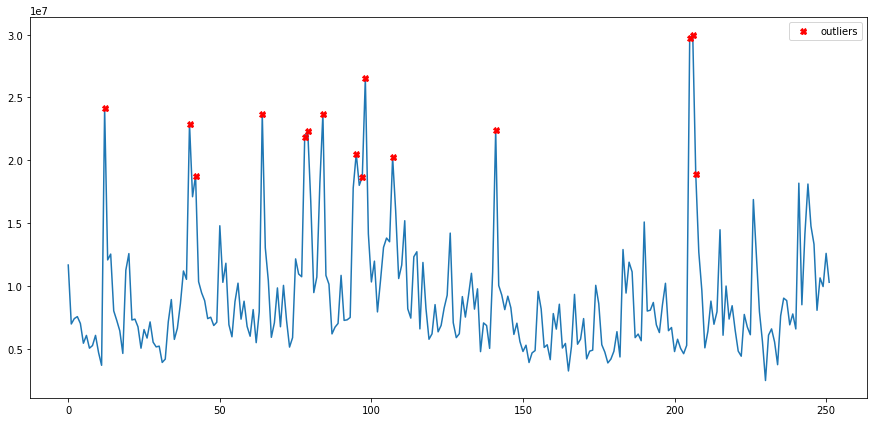

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(np.arange(len(tsla_lagged["Volume"])), tsla_lagged["Volume"])
plt.plot(np.arange(len(tsla_lagged["Volume"])), tsla_lagged["Volume"], 'X', label='outliers',markevery=outliers, c='r')
plt.legend()
plt.show()

In [ ]:
price_signal = tsla_lagged["Close"]
removed_signal = pp.removal(price_signal, 30)
noise = pp.get(price_signal, removed_signal)

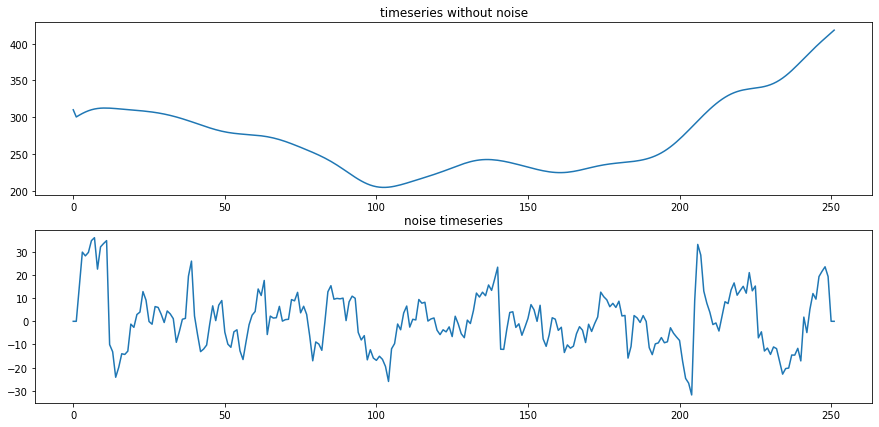

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(2, 1, 1)
plt.plot(removed_signal)
plt.title('timeseries without noise')
plt.subplot(2, 1, 2)
plt.plot(noise)
plt.title('noise timeseries')
plt.show()